In [8]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.metrics import mean_squared_error
from keras.models import load_model
from helper_functions import calc_mae

from helper_functions import calc_mae, get_picture_filenames_from_folder, load_picture_from_folder

In [2]:
# Setup
plt.rcParams["figure.figsize"] = [9, 16]

In [3]:
# Path helpers
blurred_test_path = os.path.join('clean_data', 'test', 'blur')
sharp_test_path = os.path.join('clean_data', 'test', 'sharp')

In [4]:
model_name = 'autoencoder_2023_12_23T0_53_epoch32_mae_0.0325_val_mae_0.0320.keras'
model_path = 'models'
best_model = load_model(os.path.join(model_path, model_name))

2023-12-23 11:26:50.017969: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 30953 MB memory:  -> device: 0, name: Tesla V100-PCIE-32GB, pci bus id: 0000:08:00.0, compute capability: 7.0


In [5]:
# Calculate mae for test set (for original blurred and sharp images)
filenames = get_picture_filenames_from_folder(blurred_test_path)

loss_list = []
loss_fn = calc_mae
for filename in filenames[:200]:
    blurred_test = cv2.imread(os.path.join(blurred_test_path, filename))/255
    sharp_test = cv2.imread(os.path.join(sharp_test_path, filename))/255
    
    prediction = best_model.predict(blurred_test.reshape(-1, 720, 1280, 3), verbose = 0)
    loss = loss_fn(sharp_test, prediction)
    loss_list.append(calc_mae(sharp_test, blurred_test))

2023-12-23 11:27:11.917498: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904


In [25]:
worst_pred = filenames[np.argmax(loss_list)]
print(np.max(loss_list))
worst_pred

0.08182163444081336


'GOPR0854_11_00_000027.png'

In [24]:
best_pred = filenames[np.argmin(loss_list)]
print(np.min(loss_list))
best_pred

0.005869837055192445


'GOPR0881_11_01_000245.png'

In [36]:
worst_result_blurred = load_picture_from_folder(worst_pred, blurred_test_path)
worst_result_image = best_model.predict(worst_result_blurred.reshape((1, 720, 1280, 3))).reshape((720, 1280, 3))

worst_result_image = np.clip((worst_result_image*255).astype("int"),0, 255)
cv2.imwrite("worst_pred.png", worst_result_image)
#worst_result_image = cv2.cvtColor(worst_result_image, cv2.COLOR_BGR2RGB)

1/1 [==============================] - 0s 34ms/step


True

In [34]:
best_result_blurred = load_picture_from_folder(best_pred, blurred_test_path)
best_result_image = best_model.predict(best_result_blurred.reshape((1, 720, 1280, 3))).reshape((720, 1280, 3))

best_result_image = np.clip((best_result_image*255).astype("int"),0, 255)
cv2.imwrite("best_pred.png", best_result_image)

1/1 [==============================] - 0s 28ms/step


True

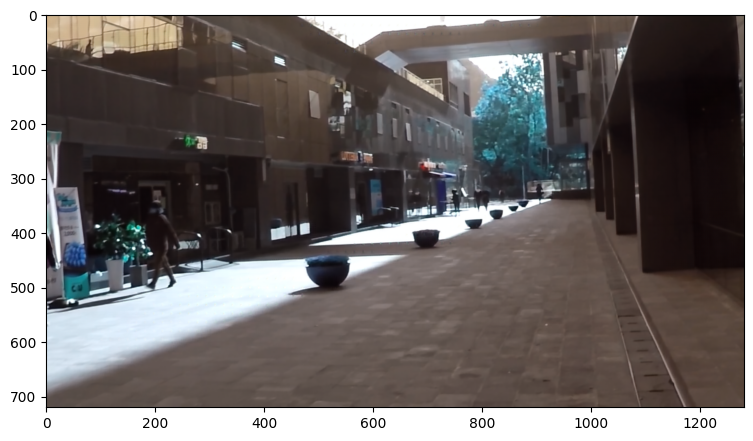

In [35]:
plt.imshow(best_result_image)
plt.show()

In [22]:
best_result_image = best_model.predict(load_picture_from_folder(best_pred, blurred_test_path).reshape((1, 720, 1280, 3))).reshape((720, 1280, 3))
best_result_image = cv2.cvtColor(best_result_image, cv2.COLOR_BGR2RGB)

1/1 [==============================] - 0s 29ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


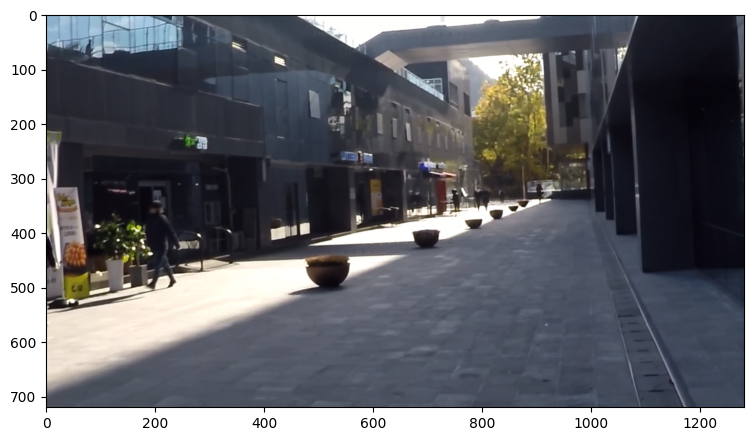

In [23]:
plt.imshow(best_result_image)
plt.show()